<a href="https://colab.research.google.com/github/Johnny-DF26/Redes_Neurais_Convolucionais/blob/main/Classifica%C3%A7%C3%A3o_Redes_Neurais_Convolucionais_Gatos_e_Cachorros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color='yellow'> **Classificação de Gatos e Cachorros**

In [ ]:
import numpy as np
import zipfile
import os
import pandas as pd
import cv2

#<font color='yellow'> **Classificação Densa**
**(loss: 0.6664 - accuracy: 0.5580)**

##<font color='bluegreen'> **Base de Dados**

In [ ]:
with zipfile.ZipFile('/content/drive/MyDrive/Visão Computacional/Datasets/cat_dog_2.zip', 'r') as f:
    f.extractall()

In [ ]:
!rm -r __MACOSX

In [ ]:
paths = '/content/cat_dog_2/training_set'

gatos, cachorros = [], []


for pasta_raiz, sub_pastas, arquivos in sorted(os.walk(paths)):
    for arquivo in arquivos:
        if arquivo.endswith('jpg'):
            if arquivo.startswith('cat'):
                caminho_gatos = os.path.join(pasta_raiz, arquivo)
                gatos.append(caminho_gatos)
            else:
                caminho_cachorros = os.path.join(pasta_raiz, arquivo)
                cachorros.append(caminho_cachorros)

In [ ]:
gatos.extend(cachorros)
previsores = gatos

In [ ]:
imagens = []
classes = []
for img_path in previsores:
    img = cv2.imread(img_path)
    img = cv2.resize(img, (64,64))
    img = img / 255
    img = img.flatten()
    imagens.append(img)

    name = os.path.basename(img_path)
    if name.startswith('cat'):
        classes.append(0)
    else:
        classes.append(1)

In [ ]:
imagens = np.asarray(imagens)
classes = np.asarray(classes)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(imagens, classes, test_size=0.25, random_state=42)


In [ ]:
X_train[0].shape

(12288,)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input

In [ ]:
network = Sequential()
network.add(Input(shape=(12288, )))
network.add(Dense(units=6144, activation='relu'))
network.add(Dropout(0.2))
network.add(Dense(units=6144, activation='relu'))
network.add(Dropout(0.2))
network.add(Dense(units=6144, activation='relu'))
network.add(Dropout(0.2))
network.add(Dense(units=1, activation='sigmoid'))

In [ ]:
network.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
network.fit(X_train, y_train, epochs=10, batch_size=128)

Epoch 1/10
24/24 [==============================] - 121s 5s/step - loss: 0.9780 - accuracy: 0.5023
Epoch 2/10
24/24 [==============================] - 116s 5s/step - loss: 0.7036 - accuracy: 0.5027
Epoch 3/10
24/24 [==============================] - 121s 5s/step - loss: 0.6935 - accuracy: 0.5250
Epoch 4/10
24/24 [==============================] - 118s 5s/step - loss: 0.6783 - accuracy: 0.5700
Epoch 5/10
24/24 [==============================] - 126s 5s/step - loss: 0.6734 - accuracy: 0.5780
Epoch 6/10
24/24 [==============================] - 123s 5s/step - loss: 0.6659 - accuracy: 0.5927
Epoch 7/10
24/24 [==============================] - 126s 5s/step - loss: 0.6647 - accuracy: 0.5973
Epoch 8/10
24/24 [==============================] - 124s 5s/step - loss: 0.6551 - accuracy: 0.6090
Epoch 9/10
24/24 [==============================] - 126s 5s/step - loss: 0.6747 - accuracy: 0.5683
Epoch 10/10
24/24 [==============================] - 128s 5s/step - loss: 0.6619 - accuracy: 0.5787


In [ ]:
loss, predicoes = network.evaluate(X_test, y_test)
predicoes

32/32 [==============================] - 9s 267ms/step - loss: 0.6664 - accuracy: 0.5580


0.5580000281333923

loss: 0.6664 - accuracy: 0.5580

#<font color='yellow'> **Classificação Convolucional Manual**

In [43]:
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten
from keras.layers import Input, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, PrecisionRecallDisplay
import zipfile
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

##<font color='green'> **Base de Dados**

In [2]:
with zipfile.ZipFile('/content/drive/MyDrive/Visão Computacional/Datasets/cat_dog_2.zip', 'r') as z:
    z.extractall()

In [3]:
!rm -r __MACOSX

In [10]:
gerador_treino = ImageDataGenerator(rescale=1./255, zoom_range=0.2, shear_range=0.1,
                                    horizontal_flip=True, rotation_range=7)

base_treino = gerador_treino.flow_from_directory('/content/cat_dog_2/training_set',
                                                 target_size=(128, 128), class_mode='categorical',
                                                 batch_size=32, shuffle=True)

Found 4000 images belonging to 2 classes.


In [11]:
gerador_teste = ImageDataGenerator(rescale=1./255)

base_teste = gerador_teste.flow_from_directory('/content/cat_dog_2/test_set',
                                                 target_size=(128, 128), class_mode='categorical',
                                                 batch_size=1, shuffle=False)

Found 1000 images belonging to 2 classes.


##<font color='green'> **Estrutura da Rede Neural**

In [15]:
def criaRede():
    network = Sequential()
    network.add(Input(shape= (128, 128, 3)))

    network.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1)))
    network.add(BatchNormalization())
    network.add(MaxPooling2D(pool_size=(2, 2)))

    network.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1)))
    network.add(BatchNormalization())
    network.add(MaxPooling2D(pool_size=(2, 2)))

    network.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1)))
    network.add(BatchNormalization())
    network.add(MaxPooling2D(pool_size=(2, 2)))

    network.add(Flatten())

    network.add(Dense(units=1400, activation='relu'))
    network.add(Dropout(0.2))
    network.add(Dense(units=1400, activation='relu'))
    network.add(Dropout(0.2))
    network.add(Dense(units=1400, activation='relu'))
    network.add(Dropout(0.2))
    network.add(Dense(units=2, activation='softmax'))

    network.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return network

In [16]:
network = criaRede()
historico = network.fit(base_treino, epochs=10, validation_data=base_teste)

Epoch 1/10
125/125 [==============================] - 33s 230ms/step - loss: 1.0873 - accuracy: 0.5527 - val_loss: 0.6864 - val_accuracy: 0.5110
Epoch 2/10
125/125 [==============================] - 28s 219ms/step - loss: 0.6459 - accuracy: 0.6327 - val_loss: 0.6612 - val_accuracy: 0.6490
Epoch 3/10
125/125 [==============================] - 30s 242ms/step - loss: 0.6256 - accuracy: 0.6550 - val_loss: 0.6685 - val_accuracy: 0.6240
Epoch 4/10
125/125 [==============================] - 31s 248ms/step - loss: 0.6069 - accuracy: 0.6765 - val_loss: 0.5981 - val_accuracy: 0.6830
Epoch 5/10
125/125 [==============================] - 33s 267ms/step - loss: 0.5773 - accuracy: 0.6995 - val_loss: 0.6140 - val_accuracy: 0.6750
Epoch 6/10
125/125 [==============================] - 33s 268ms/step - loss: 0.5638 - accuracy: 0.7182 - val_loss: 0.6555 - val_accuracy: 0.6640
Epoch 7/10
125/125 [==============================] - 34s 272ms/step - loss: 0.5530 - accuracy: 0.7215 - val_loss: 0.8806 - val_ac

##<font color='green'> **Avaliação do Modelo**

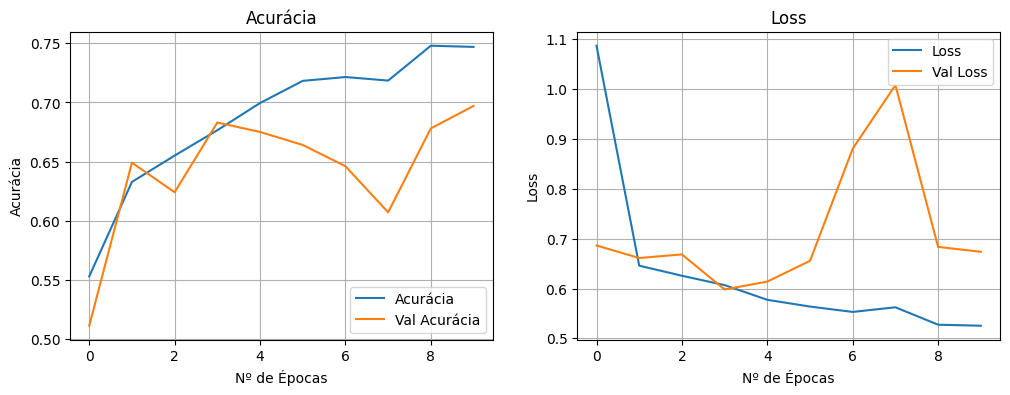

In [29]:
fig, axs  = plt.subplots(1, 2, figsize=(12, 4))

axs[0].plot(historico.history['accuracy'], label='Acurácia')
axs[0].plot(historico.history['val_accuracy'], label='Val Acurácia')
axs[0].set_title('Acurácia')
axs[0].set_ylabel('Acurácia')
axs[0].set_xlabel('Nº de Épocas')
axs[0].grid()
axs[0].legend(loc='lower right')

axs[1].plot(historico.history['loss'], label='Loss')
axs[1].plot(historico.history['val_loss'], label='Val Loss')
axs[1].set_title('Loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Nº de Épocas')
axs[1].grid()
axs[1].legend(loc='upper right')
plt.show()


In [34]:
predicoes_pct = network.predict(base_teste)
predicoes = np.argmax(predicoes_pct, axis=1)
predicoes

1000/1000 [==============================] - 6s 6ms/step


array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,

              precision    recall  f1-score   support

           0       0.68      0.74      0.71       500
           1       0.72      0.65      0.68       500

    accuracy                           0.70      1000
   macro avg       0.70      0.70      0.70      1000
weighted avg       0.70      0.70      0.70      1000



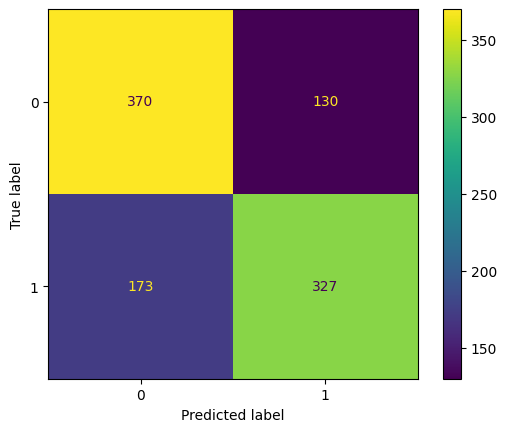

In [37]:
print(classification_report(base_teste.classes, predicoes))
ConfusionMatrixDisplay.from_predictions(base_teste.classes, predicoes)

In [86]:
acuracia = accuracy_score(base_teste.classes, predicoes)
print(f'Acurácia do Modelo: {acuracia}')

Acurácia do Modelo: 0.697


##<font color='green'> **Previsão um Valor**

In [77]:
def prever_valor(path_img, mostrar_img=False):
    img_orig = cv2.imread(path_img)
    img = cv2.resize(img_orig, (128,128))
    img = img / 255
    img  = img.reshape(-1, 128,128,3)  # np.expand_dims(img, 0)

    previsao = network.predict(img, verbose=False)
    previsao = np.argmax(previsao, axis=1)[0]

    name = list(base_teste.class_indices.keys())
    print(f'Previsao: {name[previsao].title()}')

    if mostrar_img:
        cv2_imshow(img_orig)

Previsao: Dog


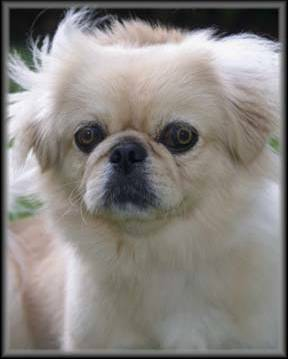

In [80]:
novo_valor = '/content/cat_dog_2/test_set/dog/dog.3514.jpg'

prever_valor(novo_valor, True)

Previsao: Cat


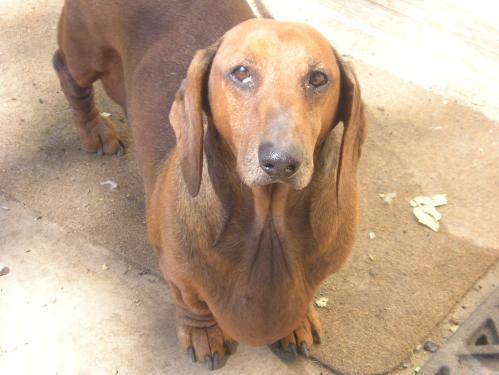

In [81]:
prever_valor('/content/cat_dog_2/test_set/dog/dog.3532.jpg', True)

Previsao: Cat


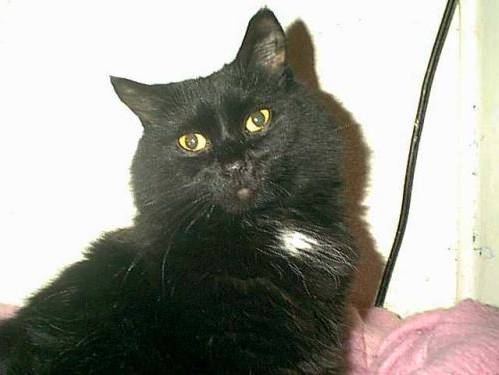

In [82]:
prever_valor('/content/cat_dog_2/test_set/cat/cat.3507.jpg', True)

#<font color='yellow'> **Classificação Convolucional Transfer Learning**

In [102]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50V2
from keras.models import Model
from keras.layers import GlobalAveragePooling2D

In [115]:
gerador_treino = ImageDataGenerator(rescale=1./255, zoom_range=0.2,
                                 rotation_range=7, horizontal_flip=True)

base_treino = gerador_treino.flow_from_directory('/content/cat_dog_2/training_set',
                                                 target_size=(256,256), class_mode='categorical',
                                                 batch_size=128, shuffle=True)

Found 4000 images belonging to 2 classes.


In [116]:
gerador_teste = ImageDataGenerator(rescale=1./255)

base_teste = gerador_teste.flow_from_directory('/content/cat_dog_2/test_set',
                                                 target_size=(256,256), class_mode='categorical',
                                                 batch_size=10, shuffle=False)

Found 1000 images belonging to 2 classes.


## <font color='green'> **Estrutura Rede Neural ResNet**

In [96]:
resnet = ResNet50V2(include_top=False, weights='imagenet', input_shape=(256, 256, 3))
resnet.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_7[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 130, 130, 64)         0         ['conv1_conv[0][0]']          
                                                                                         

In [98]:
resnet.trainable = False

In [99]:
for layer in resnet.layers:

    print(layer, layer.trainable)

<keras.src.engine.input_layer.InputLayer object at 0x788c9d9910f0> False
<keras.src.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x788c9d9b1c90> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x788c9d9b3400> False
<keras.src.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x788c9d9b32b0> False
<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x788c9db64880> False
<keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x788c9d9c7a00> False
<keras.src.layers.core.activation.Activation object at 0x788c9d95a320> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x788c9d9b0e50> False
<keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x788c9d9c7220> False
<keras.src.layers.core.activation.Activation object at 0x788c9db67c10> False
<keras.src.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x788c9d9e3430> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7

In [108]:
dense_layer = resnet.output
dense_layer = GlobalAveragePooling2D()(dense_layer)
dense_layer = Dense(units=1025, activation='relu')(dense_layer)
dense_layer = Dropout(0.2)(dense_layer)
dense_layer = Dense(units=1025, activation='relu')(dense_layer)
dense_layer = Dropout(0.2)(dense_layer)
dense_layer = Dense(units=1025, activation='relu')(dense_layer)
dense_layer = Dropout(0.2)(dense_layer)
dense_outlayer = Dense(units=2, activation='softmax')(dense_layer)

In [ ]:
network = Model(inputs=resnet.input, outputs=dense_outlayer)
network.summary()

## <font color='green'> **Treinando o Modelo**

In [117]:
network.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
historico = network.fit(base_treino, epochs=10, validation_data=base_teste)

Epoch 1/10
32/32 [==============================] - 99s 3s/step - loss: 0.0464 - accuracy: 0.9840 - val_loss: 0.0420 - val_accuracy: 0.9930
Epoch 2/10
32/32 [==============================] - 89s 3s/step - loss: 0.0202 - accuracy: 0.9912 - val_loss: 0.0397 - val_accuracy: 0.9890
Epoch 3/10
32/32 [==============================] - 99s 3s/step - loss: 0.0165 - accuracy: 0.9942 - val_loss: 0.0359 - val_accuracy: 0.9930
Epoch 4/10
32/32 [==============================] - 93s 3s/step - loss: 0.0199 - accuracy: 0.9925 - val_loss: 0.0444 - val_accuracy: 0.9890
Epoch 5/10
32/32 [==============================] - 89s 3s/step - loss: 0.0138 - accuracy: 0.9950 - val_loss: 0.0453 - val_accuracy: 0.9890
Epoch 6/10
32/32 [==============================] - 92s 3s/step - loss: 0.0121 - accuracy: 0.9955 - val_loss: 0.0512 - val_accuracy: 0.9920
Epoch 7/10
32/32 [==============================] - 92s 3s/step - loss: 0.0133 - accuracy: 0.9952 - val_loss: 0.0515 - val_accuracy: 0.9890
Epoch 8/10
32/32 [==

## <font color='green'> **Avaliação do Modelo**

In [119]:
_, acuracia = network.evaluate(base_teste)
acuracia

100/100 [==============================] - 5s 47ms/step - loss: 0.0585 - accuracy: 0.9860


0.9860000014305115

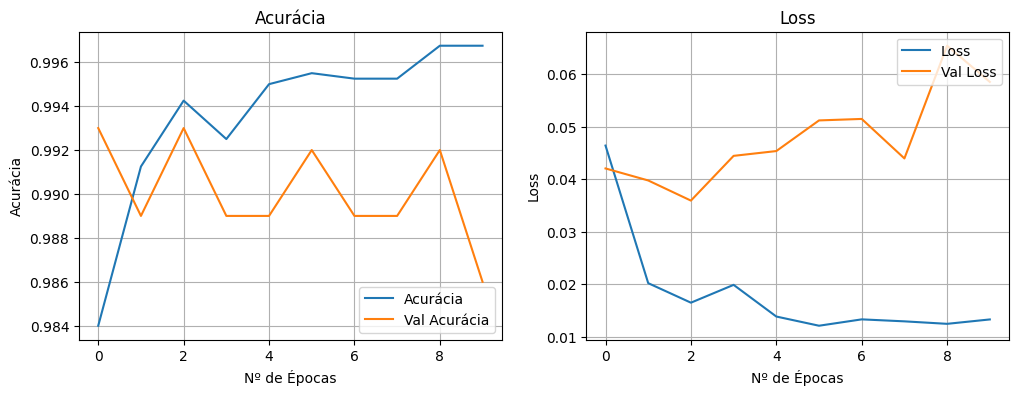

In [126]:
fig, axs  = plt.subplots(1, 2, figsize=(12, 4))

axs[0].plot(historico.history['accuracy'], label='Acurácia')
axs[0].plot(historico.history['val_accuracy'], label='Val Acurácia')
axs[0].set_title('Acurácia')
axs[0].set_ylabel('Acurácia')
axs[0].set_xlabel('Nº de Épocas')
axs[0].grid()
axs[0].legend(loc='lower right')

axs[1].plot(historico.history['loss'], label='Loss')
axs[1].plot(historico.history['val_loss'], label='Val Loss')
axs[1].set_title('Loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Nº de Épocas')
axs[1].grid()
axs[1].legend(loc='upper right')
plt.show()

In [122]:
predicoes_pct = network.predict(base_teste)
predicoes = np.argmax(predicoes_pct, axis=1)
predicoes

100/100 [==============================] - 4s 44ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [124]:
base_teste.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

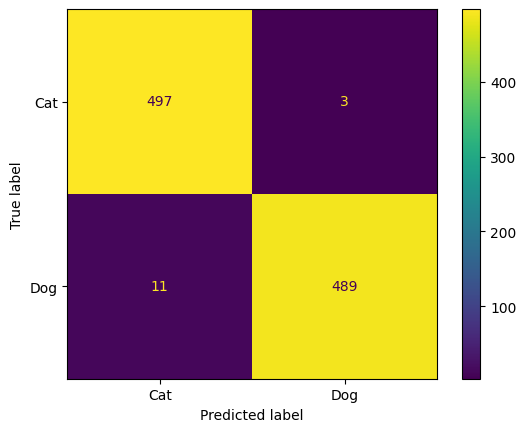

In [142]:
ConfusionMatrixDisplay.from_predictions(base_teste.classes, predicoes, display_labels=['Cat', 'Dog']);

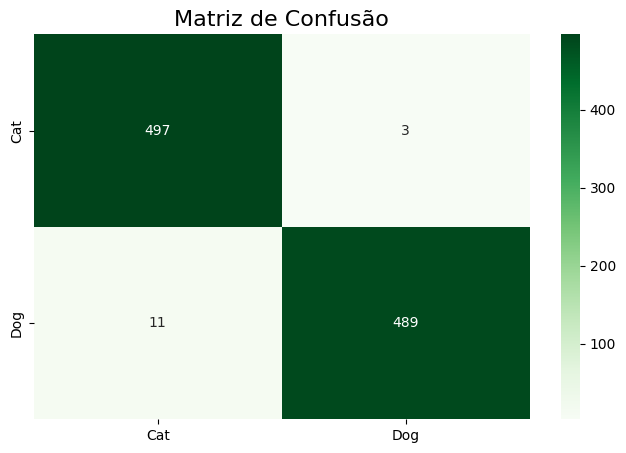

In [140]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(figsize=(8,5))
cm = confusion_matrix(base_teste.classes, predicoes)
ax = sns.heatmap(cm, annot=True, fmt='.0f', cmap='Greens', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
ax.set_title('Matriz de Confusão', fontsize=16)

plt.show()

## <font color='green'> **Salvando o Modelo**

In [144]:
classificador_cat_dog_json = network.to_json()

with open('classificador_cat_dog_cnn_transfer.json', 'w') as f:
    f.write(classificador_cat_dog_json)

In [145]:
network.save_weights('pesos_cat_dog_cnn.h5')

## <font color='green'> **Abrindo o Modelo Salvo**

In [147]:
from keras.models import model_from_json

In [146]:
with open('/content/classificador_cat_dog_cnn_transfer.json', 'r') as f:
    classificador = f.read()

In [149]:
model = model_from_json(classificador)

model.load_weights('/content/pesos_cat_dog_cnn.h5')

In [151]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## <font color='green'> **Prevendo Novo Valor**

In [156]:
def prever_valor(path_img, mostrar_img=False):
    img_orig = cv2.imread(path_img)
    img = cv2.resize(img_orig, (256,256))
    img = img / 255
    img  = img.reshape(-1, 256, 256, 3)  # np.expand_dims(img, 0)

    previsao = model.predict(img, verbose=False)
    previsao = np.argmax(previsao, axis=1)[0]

    name = list(base_teste.class_indices.keys())
    print(f'Previsao: {name[previsao].title()}')

    if mostrar_img:
        cv2_imshow(img_orig)

Previsao: Dog


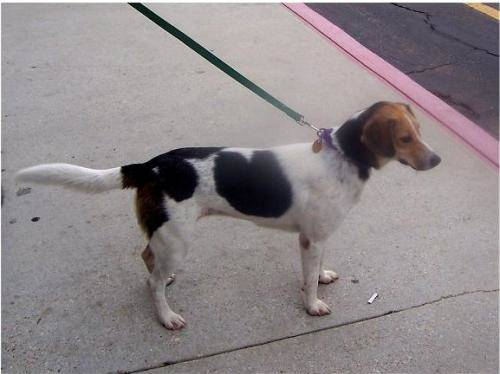

In [163]:
prever_valor('/content/cat_dog_2/test_set/dog/dog.3564.jpg', mostrar_img=True)